# PM2.5 prediction

### Import libraries

In [1]:
import math
import os

import matplotlib.pyplot as plt
import numpy as np
from numpy.random import seed
from scipy.stats import stats
seed(1)
from fs import methods as m
from fs import model as ml
import geopandas as gpd
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score


### Data Import

2022-05-25 16:52:20.928217: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-05-25 16:52:20.928653: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 14)                210       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 8         
Total params: 323
Trainable params: 323
Non-trainable params: 0
_________________________________________________________________
---------grid_0_01_0418_0425_2021.gpkg---------
dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


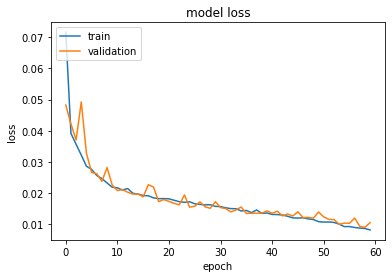

Values predicted:  [[15.307023 ]
 [16.190287 ]
 [16.648508 ]
 [15.217957 ]
 [17.242363 ]
 [16.229883 ]
 [15.220077 ]
 [16.497814 ]
 [15.244204 ]
 [15.054065 ]
 [14.79677  ]
 [17.030201 ]
 [18.550457 ]
 [18.264774 ]
 [17.60746  ]
 [19.95205  ]
 [18.389326 ]
 [12.894601 ]
 [17.593546 ]
 [18.224672 ]
 [20.47252  ]
 [16.9442   ]
 [17.423418 ]
 [18.938978 ]
 [17.025084 ]
 [21.363495 ]
 [17.575884 ]
 [17.205067 ]
 [16.023142 ]
 [19.247461 ]
 [12.499797 ]
 [16.104944 ]
 [14.647661 ]
 [17.71679  ]
 [18.3136   ]
 [18.453104 ]
 [16.376965 ]
 [16.617443 ]
 [14.957809 ]
 [13.2132   ]
 [15.119336 ]
 [18.888481 ]
 [16.56018  ]
 [17.337574 ]
 [21.510946 ]
 [20.748875 ]
 [16.14169  ]
 [22.573946 ]
 [16.771591 ]
 [17.60141  ]
 [19.210066 ]
 [19.722134 ]
 [16.153915 ]
 [17.380213 ]
 [19.008192 ]
 [18.940287 ]
 [15.074512 ]
 [16.70425  ]
 [16.796896 ]
 [16.775425 ]
 [17.934696 ]
 [22.30214  ]
 [19.823957 ]
 [18.18962  ]
 [18.891773 ]
 [17.96891  ]
 [18.207758 ]
 [21.029156 ]
 [17.181427 ]
 [12.101377 ]
 

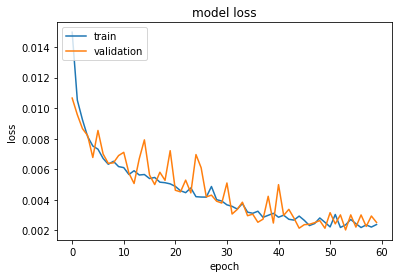

Values predicted:  [[13.556633 ]
 [13.234152 ]
 [23.573118 ]
 [18.682373 ]
 [11.29613  ]
 [17.665705 ]
 [14.48439  ]
 [11.658794 ]
 [16.75877  ]
 [15.87371  ]
 [15.224215 ]
 [18.446175 ]
 [23.24802  ]
 [17.956114 ]
 [24.276814 ]
 [16.874352 ]
 [12.453913 ]
 [14.845097 ]
 [16.536875 ]
 [13.111658 ]
 [ 9.308067 ]
 [12.7331085]
 [18.233826 ]
 [23.917696 ]
 [10.543078 ]
 [ 9.3018055]
 [15.875245 ]
 [26.49582  ]
 [11.492212 ]
 [19.030848 ]
 [15.587474 ]
 [12.384526 ]
 [10.384978 ]
 [12.779417 ]
 [24.104769 ]
 [11.284798 ]
 [16.209177 ]
 [16.567617 ]
 [14.677343 ]
 [17.450848 ]
 [16.807745 ]
 [12.435547 ]
 [11.45273  ]
 [18.011925 ]
 [11.492955 ]
 [12.436362 ]
 [19.675833 ]
 [14.72362  ]
 [11.790532 ]
 [13.521688 ]
 [10.735511 ]
 [13.525633 ]
 [14.750258 ]
 [18.350426 ]
 [ 9.087072 ]
 [10.561358 ]
 [12.828659 ]
 [14.5641575]
 [26.648851 ]
 [16.632298 ]
 [16.78053  ]
 [12.519648 ]
 [17.359798 ]
 [17.589865 ]
 [10.889789 ]
 [16.509583 ]
 [19.005732 ]
 [21.087898 ]
 [26.475454 ]
 [13.092474 ]
 

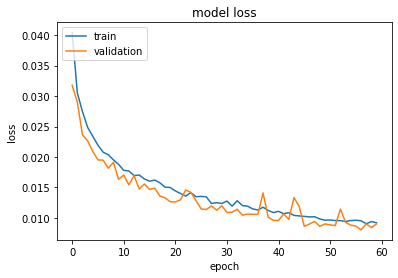

Values predicted:  [[11.694566 ]
 [13.814606 ]
 [10.851428 ]
 [13.4927435]
 [12.203901 ]
 [11.684228 ]
 [ 9.521433 ]
 [14.287474 ]
 [12.698532 ]
 [ 9.8140135]
 [11.59856  ]
 [11.928613 ]
 [13.28377  ]
 [13.62206  ]
 [14.130829 ]
 [13.016836 ]
 [12.971923 ]
 [ 9.753572 ]
 [12.902132 ]
 [10.868902 ]
 [13.410764 ]
 [ 9.300521 ]
 [ 9.456542 ]
 [13.908902 ]
 [12.875642 ]
 [13.079482 ]
 [14.0751505]
 [13.569765 ]
 [12.463391 ]
 [11.881273 ]
 [13.331442 ]
 [11.692894 ]
 [10.851428 ]
 [12.165376 ]
 [16.816442 ]
 [11.46046  ]
 [12.992477 ]
 [13.699029 ]
 [12.172851 ]
 [10.851428 ]
 [13.476324 ]
 [11.405624 ]
 [11.453982 ]
 [11.967873 ]
 [10.861825 ]
 [11.301669 ]
 [11.81945  ]
 [14.549322 ]
 [13.278946 ]
 [13.225055 ]
 [11.895718 ]
 [11.627471 ]
 [11.729569 ]
 [11.067756 ]
 [13.700024 ]
 [10.555266 ]
 [12.005663 ]
 [12.56521  ]
 [10.117561 ]
 [ 9.910895 ]
 [12.435604 ]
 [12.430856 ]
 [11.661748 ]
 [10.851428 ]
 [12.41486  ]
 [10.851428 ]
 [14.225495 ]
 [16.792278 ]
 [11.107732 ]
 [10.792334 ]
 

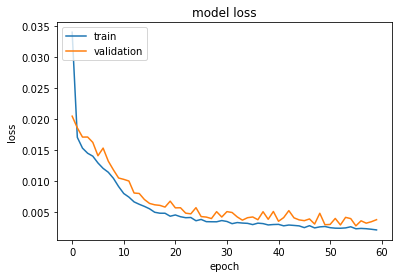

Values predicted:  [[27.551792]
 [33.29524 ]
 [39.31942 ]
 [25.589417]
 [32.762115]
 [26.355288]
 [28.079395]
 [26.622713]
 [37.546818]
 [44.227016]
 [28.325964]
 [26.688345]
 [39.794624]
 [26.847761]
 [26.771769]
 [35.010612]
 [25.791376]
 [37.891056]
 [29.47891 ]
 [27.159763]
 [41.16195 ]
 [37.510376]
 [27.067564]
 [30.816143]
 [26.632261]
 [40.76788 ]
 [20.891888]
 [29.98008 ]
 [38.512344]
 [31.104984]
 [42.88401 ]
 [37.67276 ]
 [41.7621  ]
 [27.636177]
 [20.891888]
 [32.088184]
 [42.91121 ]
 [41.335365]
 [30.111069]
 [38.379192]
 [25.3933  ]
 [25.221243]
 [30.059523]
 [27.21544 ]
 [37.542984]
 [31.968586]
 [27.715096]
 [33.263706]
 [26.138416]
 [31.526175]
 [41.267677]
 [27.723501]
 [27.711672]
 [25.968838]
 [36.33561 ]
 [28.307734]
 [26.278582]
 [31.105309]
 [27.419558]
 [37.629738]
 [25.83712 ]
 [41.101925]
 [26.612516]
 [29.024244]
 [27.95403 ]
 [40.678158]
 [26.086035]
 [33.143597]
 [33.772644]
 [31.048458]
 [28.229563]
 [41.740597]
 [31.08146 ]
 [27.728424]
 [35.29784 ]
 [27.6

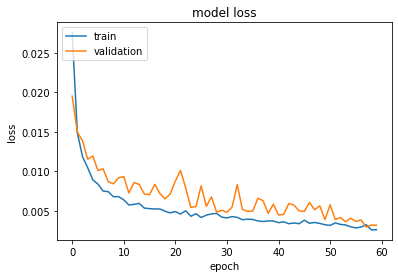

Values predicted:  [[21.200783 ]
 [25.240105 ]
 [28.437397 ]
 [18.530993 ]
 [15.842391 ]
 [19.66247  ]
 [19.195421 ]
 [22.165157 ]
 [19.925346 ]
 [19.599758 ]
 [12.651571 ]
 [21.639914 ]
 [16.306337 ]
 [10.451366 ]
 [20.638945 ]
 [16.767277 ]
 [11.315723 ]
 [18.133755 ]
 [24.979492 ]
 [17.77584  ]
 [19.552275 ]
 [17.280487 ]
 [15.868195 ]
 [11.402226 ]
 [16.793875 ]
 [25.197617 ]
 [15.164215 ]
 [15.193377 ]
 [18.161434 ]
 [23.041203 ]
 [14.488553 ]
 [19.914558 ]
 [28.616129 ]
 [19.288076 ]
 [13.345167 ]
 [10.451366 ]
 [14.770279 ]
 [16.912703 ]
 [19.158653 ]
 [21.342754 ]
 [22.96908  ]
 [11.4750805]
 [23.883753 ]
 [24.883661 ]
 [18.21519  ]
 [17.360588 ]
 [10.451366 ]
 [17.700893 ]
 [20.009531 ]
 [25.000023 ]
 [16.474567 ]
 [13.709101 ]
 [17.00994  ]
 [11.57287  ]
 [21.714897 ]
 [16.980753 ]
 [18.705757 ]
 [15.2948675]
 [17.262314 ]
 [15.252476 ]
 [23.263939 ]
 [19.636536 ]
 [22.615276 ]
 [23.283163 ]
 [15.930284 ]
 [19.47736  ]
 [11.985464 ]
 [10.740198 ]
 [23.56118  ]
 [17.860197 ]
 

In [2]:
RESOLUTION = '0_01'
TARGET = 'pm25_st'
KNN = True
knn_value = 30
NUMBER_OF_PARAMS = 12



NUMBER_OF_COVARIATES = NUMBER_OF_PARAMS + 2


geopackages = os.listdir('assets/grids_'+RESOLUTION)


results1 = pd.DataFrame(columns=['MAE', 'MSE', 'mean Y-Test', 'mean Y-predicted', 'R2'])
results2 = pd.DataFrame(columns=['MAE', 'MSE', 'mean Y-Test', 'mean Y-predicted', 'R2'])

model = Sequential()
model.add(Dense(NUMBER_OF_COVARIATES, input_dim=NUMBER_OF_COVARIATES, kernel_initializer='normal', activation='relu'))
model.add(Dense(NUMBER_OF_COVARIATES/2, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])


for index, grid in enumerate(geopackages):
    data = gpd.read_file('assets/grids_'+RESOLUTION+'/'+ grid)

    if KNN:
        data = m.process_data(data, knn_value)

    coll = pd.DataFrame()
    coll['pm25_st'] = data['pm25_st']
    coll['pm25_cams'] = data['pm25_cams']
    coll = coll.dropna(axis=0)

    #print('Mean Absolute Error: ',mean_absolute_error(coll['pm25_cams'], coll['pm25_st'], ))
    #print('Mean Squared Error: ',mean_squared_error(coll['pm25_cams'], coll['pm25_st']))
    #print('R2 score: ',r2_score(coll['pm25_cams'], coll['pm25_st']))

    data = data[~data[TARGET].isnull()]
    data = data.dropna(axis=1)

    data.pop('geometry')

    labels = pd.read_csv('assets/fs(general).csv')['Features']

    #read variables which are not null
    score_results = pd.DataFrame()

    #Store dataset in x and y variables
    X = pd.DataFrame(data=data, columns=labels ).dropna(axis = 1)
    X = X.iloc[:, :NUMBER_OF_PARAMS]
    X['lat_cen'] = data['lat_cen']
    X['lng_cen'] = data['lng_cen']

    Y = pd.DataFrame(data=data, columns=[TARGET] )
    Y = Y.values.ravel()


    #NUMBER_OF_COVARIATES = X.shape[1]
    y1 = np.array(Y)

    X_train, X_val, y_train, y_val = train_test_split(X, y1, test_size=0.30)

    y_train=np.reshape(y_train, (-1,1))
    y_val=np.reshape(y_val, (-1,1))

    scaler_x = MinMaxScaler()
    scaler_y = MinMaxScaler()

    scaler_x.fit(X_train)
    xtrain_scale=scaler_x.transform(X_train)
    scaler_x.fit(X_val)
    xval_scale=scaler_x.transform(X_val)

    scaler_y.fit(y_train)
    ytrain_scale=scaler_y.transform(y_train)
    scaler_y.fit(y_val)
    yval_scale=scaler_y.transform(y_val)


    print('---------'+ grid +'---------')




    history=model.fit(xtrain_scale, ytrain_scale, epochs=60, batch_size=1, verbose=0, validation_split=0.30)
    predictions = model.predict(xval_scale)

    print(history.history.keys())
    # "Loss"
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    #plt.plot(history.history['accuracy'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

    predictions = scaler_y.inverse_transform(predictions)

    results1.loc[index]= [round(mean_absolute_error(y_val, predictions),3), round(mean_squared_error(y_val, predictions),3), round(np.mean(y_val), 3), round(np.mean(predictions), 3), round(r2_score(y_val, predictions), 3)]
    results1.rename(index={index: grid}, inplace=True)

    print('Values predicted: ', predictions)
    print('Values : ', scaler_y.inverse_transform(yval_scale))
    print('---------VALIDATION WITH ARPA (TEST_SET)---------')

    print('Mean Absolute Error: ',mean_absolute_error(y_val, predictions))
    print('Mean Squared Error: ',mean_squared_error(y_val, predictions))
    print('Mean (Y-test):',np.mean(y_val))
    print('Mean (Y-predicted): ',np.mean(predictions))
    print('R2 score: ',r2_score(y_val, predictions))

    #%%

    data_new = m.increase_data(gpd.read_file('assets/grids_'+RESOLUTION+'/'+ grid), 'pm25_st', 5)
    data_new = data_new[~data_new[TARGET].isnull()]
    pm25_obs = data_new['pm25_st']
    X_new = pd.DataFrame(data=data_new, columns=labels).dropna(axis=1)
    X_new = X_new.iloc[:, :NUMBER_OF_PARAMS]

    X_new['lat_cen'] = data_new['lat_cen']
    X_new['lng_cen'] = data_new['lng_cen']
    scaler_x = MinMaxScaler()
    scaler_x.fit(X_new)
    X_new_scale=scaler_x.transform(X_new)

    predictions_pm25 = model.predict(X_new_scale,  batch_size=1)
    predictions_pm25 = pd.Series(np.array(scaler_y.inverse_transform(predictions_pm25)).reshape((-1,)))
    e = pd.DataFrame()

    e['predictions_pm25'] = list(predictions_pm25)
    e['pm25_obs'] = list(pm25_obs)
    e = e.dropna(axis=0)
    print('---------VALIDATION WITH ARPA (ALL)---------')
    print('Mean Absolute Error: ',mean_absolute_error(e['pm25_obs'], e['predictions_pm25']))
    print('Mean Squared Error: ',mean_squared_error(e['pm25_obs'], e['predictions_pm25']))
    print('Mean (Y-test):',np.mean(e['pm25_obs']))
    print('Mean (Y-predicted): ',np.mean(e['predictions_pm25']))
    print('R2 score: ',r2_score(e['pm25_obs'], e['predictions_pm25']))

    results2.loc[index]= [round(mean_absolute_error(e['pm25_obs'], e['predictions_pm25']),3), round(mean_squared_error(e['pm25_obs'], e['predictions_pm25']),3), round(np.mean(e['pm25_obs']),3), round(np.mean(e['predictions_pm25']),3), round(r2_score(e['pm25_obs'], e['predictions_pm25']),3)]
    results2.rename(index={index: grid}, inplace=True)

results1 = results1.T
results2 = results2.T

results1.to_excel('assets/test/keras1G'+RESOLUTION+'.xlsx')
results2.to_excel('assets/test/keras2G'+RESOLUTION+'.xlsx')
